In [1]:
import tardis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

In [2]:
wh = tardis.get_wh_postgres_connection()
gc=tardis.get_google_sheets_connection()

In [3]:
shift_df = wh.execute_query(
"""
SELECT
    worker_id,
    shift_id, 
    company_id, 
    is_reconciled_needed_primary, 
  is_reconciled_needed_worked, 
    shift_created_ltz,
    scheduled_start_ltz, 
    scheduled_end_ltz, 
    reconciled_start_ltz, 
    reconciled_end_ltz, 
    approx_bill,
    approx_pay,
    labor_hours,
    allstarred_for_shift,
    match_is_allstar,
    blocked_for_shift,
    block_reason,
    most_accurate_outcome,
    is_excused,
    crowflies_miles,
    position_id,
    event_id,
    company_created_ct,
    COALESCE(venue_closest_market_id, venue_listed_market_id, company_market_id) as market_id
FROM starbase_dev.shift_base
LEFT JOIN starbase_dev.group_base USING(group_id)
LEFT JOIN starbase_dev.event_base USING(event_id)
LEFT JOIN starbase_dev.venue_base USING(venue_id)
LEFT JOIN starbase_dev.service_base USING(service_id)
LEFT JOIN starbase_dev.company_base USING(company_id)
LEFT JOIN starbase_dev.shift_kpi_flags USING(shift_id)
LEFT JOIN starbase_dev.shift_finance USING(shift_id)
LEFT JOIN starbase_dev.shift_allstars_and_blocks USING(shift_id)
LEFT JOIN starbase_dev.shift_outcome USING(shift_id, worker_id)
LEFT JOIN starbase_dev.shift_worker_venue_distance USING(shift_id, worker_id, venue_id)
WHERE is_reconciled_needed_primary OR is_reconciled_needed_worked
"""
)

In [4]:
company_markets = wh.execute_query(
"""
SELECT 
    company_id, 
   company_market_id
FROM starbase_dev.company_base
"""
)

In [5]:
company_markets.to_pickle('company_markets.pkl')

In [6]:
shift_df.to_pickle('shift_df_raw_1.pkl')

In [7]:
shift_base = pd.read_pickle('shift_df_raw_1.pkl')

In [8]:
company_markets = pd.read_pickle('company_markets.pkl')

In [9]:
shift_df.shift_created_ltz.max()

Timestamp('2018-04-09 14:31:45.011947')

In [10]:
shift_base=shift_base[shift_base['scheduled_start_ltz']>'03-01-2015'].copy()

In [11]:
shift_base.to_pickle('shift_df1_1.pkl')

In [12]:
shift_df1 = pd.read_pickle('shift_df1_1.pkl')

In [13]:
shift_df1

,worker_id,shift_id,company_id,is_reconciled_needed_primary,is_reconciled_needed_worked,shift_created_ltz,scheduled_start_ltz,scheduled_end_ltz,reconciled_start_ltz,reconciled_end_ltz,...,match_is_allstar,blocked_for_shift,block_reason,most_accurate_outcome,is_excused,crowflies_miles,position_id,event_id,company_created_ct,market_id
0,11900.0,131811,635,True,True,2015-09-25 16:50:13.484161,2015-10-03 13:00:00,2015-10-03 20:00:00,2015-10-03 13:00:00,2015-10-03 20:15:00,...,False,False,None,Worked,False,36.191072,19.0,29641,2015-09-25 16:08:39.284027,5
1,12665.0,152256,482,True,True,2015-10-16 00:12:59.598885,2015-10-18 16:30:00,2015-10-19 00:00:00,2015-10-18 16:00:00,2015-10-18 23:51:00,...,False,False,None,Worked,False,3.056138,6.0,35138,2015-08-28 18:54:03.380668,2
2,9058.0,160222,482,True,True,2015-10-22 08:51:25.409270,2015-10-30 18:30:00,2015-10-31 00:30:00,2015-10-30 18:30:00,2015-10-30 23:00:00,...,False,False,None,Worked,False,6.835181,19.0,36632,2015-08-28 18:54:03.380668,2
3,25145.0,330511,766,True,True,2016-03-23 14:30:45.215228,2016-03-23 17:00:00,2016-03-24 00:30:00,2016-03-23 17:00:00,2016-03-24 00:30:00,...,False,False,None,Worked,False,2.829548,9.0,81765,2015-11-03 14:31:56.986935,7
4,26244.0,396379,97,True,True,2016-05-09 14:20:23.635547,2016-05-12 11:00:00,2016-05-12 19:00:00,2016-05-12 11:00:00,2016-05-12 19:15:00,...,False,False,None,Worked,False,1.820505,12.0,99663,2014-06-19 14:15:01.410000,1
5,27317.0,412784,482,True,True,2016-05-23 17:11:55.215794,2016-05-30 10:30:00,2016-05-30 16:30:00,2016-05-30 10:30:00,2016-05-30 16:00:00,...,False,False,None,Worked,False,5.949808,6.0,105077,2015-08-28 18:54:03.380668,2
6,15236.0,438158,482,True,True,2016-06-13 15:34:36.838823,2016-06-19 11:30:00,2016-06-19 17:30:00,2016-06-19 11:30:00,2016-06-19 15:30:00,...,False,False,None,Worked,False,7.528185,19.0,111900,2015-08-28 18:54:03.380668,2
7,28484.0,438676,940,True,True,2016-06-13 14:39:40.556767,2016-06-20 08:00:00,2016-06-20 16:30:00,2016-06-20 08:00:00,2016-06-20 19:00:00,...,False,False,None,Worked,False,5.589518,8.0,111981,2016-01-08 10:45:56.679741,9
8,20105.0,462507,482,True,False,2016-07-01 17:00:04.468870,2016-07-03 10:00:00,2016-07-03 17:00:00,NaT,NaT,...,False,False,None,Did not work (other),False,6.126776,6.0,117543,2015-08-28 18:54:03.380668,2
9,9058.0,481480,482,True,True,2016-07-22 14:11:11.384800,2016-07-29 16:30:00,2016-07-29 22:30:00,2016-07-29 16:30:00,2016-07-29 22:30:00,...,False,False,None,Worked,False,6.835181,6.0,123157,2015-08-28 18:54:03.380668,2


In [14]:
subslice = shift_df1[shift_df1.is_reconciled_needed_primary].copy()

In [15]:
subslice['shift_created_ltz_dt'] = pd.to_datetime(subslice['shift_created_ltz']).dt.date

In [16]:
subslice.sort_values('shift_created_ltz_dt', inplace=True)

In [17]:
subslice.groupby('company_id').shift_created_ltz_dt.diff() / pd.Timedelta('1D')

571896    NaN
294359      0
660240      0
503610      0
472096      0
216056      0
323436      0
14773       0
164818      0
371648      0
361835      0
279216      0
23814       0
401677      0
418537      0
537105      0
1825        0
46536       0
708618      0
617556      0
351501      0
74759       0
665435      0
758699      0
202284      0
601374      0
665695    NaN
492365      0
23375     NaN
575056    NaN
         ... 
592576      0
290330      0
177326      0
507940      0
95338       0
597174      0
254129    125
477619      0
284221      0
175764      0
677629      0
314458      0
509527      0
677658      0
175711      0
562419      0
179055      0
76644       0
518612      0
37864       0
53102       0
345008      0
477537      0
345029      0
345044      0
509451      0
624814      3
95302       0
95258       0
82486       0
Name: shift_created_ltz_dt, Length: 726594, dtype: object

In [18]:
new_df = subslice[['company_id','shift_created_ltz_dt']]

In [19]:
subslice_group_1 = new_df.sort_values(['company_id','shift_created_ltz_dt'],ascending=True).groupby(['company_id'])

In [20]:
data = subslice_group_1.shift_created_ltz_dt.diff()

In [21]:
dataNew = data / pd.Timedelta('1D')

In [22]:
df_new = dataNew.replace(0, None).dropna()

In [23]:
iod = df_new.values.tolist()

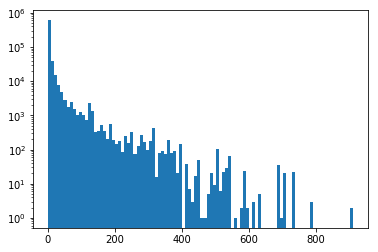

('95 percentile iod:', 28.0)


In [24]:
import matplotlib.pylab as plt

plt.hist(iod, bins=100, log=True)
plt.show()

print('95 percentile iod:',np.percentile(iod, 95))
plt.show()

In [25]:
shift_base = shift_base.merge(
    shift_base.groupby('company_id').shift_created_ltz.min().rename('first_order').reset_index(),
    how='left',
    on='company_id'
)

In [26]:
shift_base['shift_create_date'] = shift_base.shift_created_ltz.dt.date

In [27]:
shift_base['first_order_date'] = shift_base.first_order.dt.date

In [28]:
shift_base['NumDays_between'] = (shift_base.shift_create_date - shift_base.first_order_date )/pd.Timedelta('1D') 

In [29]:
# till this you have companies with the days on which the company has placed an order with the number of shifts on that day
client_timeline=(
    shift_base[shift_base.NumDays_between>=0]
        .groupby(['company_id','NumDays_between'])
        .size()
        .sort_index()
        .rename('Num_Shifts')
        .to_frame() 
)

In [30]:
# You create a series from the first order till max of first order. when company has not placed an order, it is NaN. 
# issue is we use max of Number of days between for the first company as number of days between for all companies
#can't go pass today
client_timeline = (
    client_timeline.reindex(pd.MultiIndex.from_product([shift_base.company_id.unique(), range(int(shift_base.NumDays_between.max()+1))], names=['company_id', 'NumDays_between']))
)

In [31]:
client_timeline.sort_index(inplace=True)

In [32]:
client_timeline.Num_Shifts.fillna(0, inplace=True)

In [33]:
client_timeline = client_timeline.reset_index()

In [34]:
# shift created first date and forward fill

client_timeline = client_timeline.merge(
    shift_base.groupby('company_id').shift_create_date.min().rename('date').reset_index(),
    on='company_id',
    how='left'
)

In [35]:
pd.to_datetime(client_timeline.date)

0         2015-03-24
1         2015-03-24
2         2015-03-24
3         2015-03-24
4         2015-03-24
5         2015-03-24
6         2015-03-24
7         2015-03-24
8         2015-03-24
9         2015-03-24
10        2015-03-24
11        2015-03-24
12        2015-03-24
13        2015-03-24
14        2015-03-24
15        2015-03-24
16        2015-03-24
17        2015-03-24
18        2015-03-24
19        2015-03-24
20        2015-03-24
21        2015-03-24
22        2015-03-24
23        2015-03-24
24        2015-03-24
25        2015-03-24
26        2015-03-24
27        2015-03-24
28        2015-03-24
29        2015-03-24
             ...    
2947749   2018-04-06
2947750   2018-04-06
2947751   2018-04-06
2947752   2018-04-06
2947753   2018-04-06
2947754   2018-04-06
2947755   2018-04-06
2947756   2018-04-06
2947757   2018-04-06
2947758   2018-04-06
2947759   2018-04-06
2947760   2018-04-06
2947761   2018-04-06
2947762   2018-04-06
2947763   2018-04-06
2947764   2018-04-06
2947765   201

In [36]:
# add the number of days from first date to get current date of shift
client_timeline.date = (pd.to_datetime(client_timeline.date) + client_timeline.NumDays_between * pd.Timedelta('1D'))

In [37]:
client_timeline = client_timeline[client_timeline.date <= client_timeline.date.max()].copy()

In [38]:
client_timeline.set_index(['company_id', 'NumDays_between'], inplace=True)

In [39]:
# functions on group by can be three types: aggregation to a single value, row-by-row-transformation, or windowed row-by-row-transformation or row by row transformations
# example of windowed row by row trans formation
client_timeline.reset_index(level=0).groupby('company_id').Num_Shifts.rolling(window=7, min_periods=1).sum()
# notice groupby column was added to the existing index turning it into  multi index (which happens to match the original index)

company_id  NumDays_between
6           0                  10.0
            1                  10.0
            2                  10.0
            3                  10.0
            4                  10.0
            5                  10.0
            6                  10.0
            7                   0.0
            8                   0.0
            9                   0.0
            10                  0.0
            11                  0.0
            12                  0.0
            13                  2.0
            14                  4.0
            15                  4.0
            16                  4.0
            17                 22.0
            18                 22.0
            19                 22.0
            20                 20.0
            21                 18.0
            22                 18.0
            23                 18.0
            24                  0.0
            25                  0.0
            26                  0.0


In [40]:
# example of aggregation to single value
client_timeline.reset_index(level=0).groupby('company_id').Num_Shifts.sum()
# notice groupby column became the only index

company_id
6        471.0
8       9659.0
9        924.0
10         6.0
11        63.0
12       397.0
13        48.0
15       611.0
17         3.0
18       548.0
22        36.0
23       540.0
25      1176.0
26       146.0
27       761.0
28      4591.0
30       219.0
32       492.0
33        78.0
35      2330.0
38      4679.0
39      3024.0
40       382.0
42        29.0
47       860.0
49       793.0
50        78.0
51      1938.0
52         4.0
55        76.0
         ...  
3687      20.0
3688       9.0
3689       5.0
3691      79.0
3693       1.0
3697       2.0
3698      13.0
3699       3.0
3700      24.0
3701      29.0
3702       7.0
3703      38.0
3705      32.0
3706      14.0
3707       2.0
3709       1.0
3710      17.0
3711       2.0
3714      12.0
3715       5.0
3717      96.0
3718      21.0
3719       8.0
3720      16.0
3733      17.0
3739       2.0
3740       7.0
3741      11.0
3745       3.0
3746       3.0
Name: Num_Shifts, Length: 2539, dtype: float64

In [41]:
# example row-by-row transformation without windowing
client_timeline.reset_index(level=0).groupby('company_id').Num_Shifts.shift()
# notice groupby column is not used (returns original index)

NumDays_between
0        NaN
1       10.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       2.0
15       2.0
16       0.0
17       0.0
18      18.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       5.0
29       0.0
        ... 
1131     0.0
1132     0.0
1133     0.0
1134     0.0
1135     0.0
1136     0.0
1137     0.0
1138     0.0
1139     0.0
1140     0.0
1141     0.0
1142     0.0
1143     0.0
1144     0.0
1145     0.0
1146     0.0
1147     0.0
1148     0.0
1149     0.0
1150     0.0
1151     0.0
1152     0.0
1153     0.0
1154     0.0
1155     0.0
1156     0.0
1157     0.0
1158     0.0
1159     0.0
1160     0.0
Name: Num_Shifts, Length: 2947779, dtype: float64

In [42]:
client_timeline.reset_index(level=0).groupby('company_id').Num_Shifts.rolling(window=7, min_periods=1).sum()

company_id  NumDays_between
6           0                  10.0
            1                  10.0
            2                  10.0
            3                  10.0
            4                  10.0
            5                  10.0
            6                  10.0
            7                   0.0
            8                   0.0
            9                   0.0
            10                  0.0
            11                  0.0
            12                  0.0
            13                  2.0
            14                  4.0
            15                  4.0
            16                  4.0
            17                 22.0
            18                 22.0
            19                 22.0
            20                 20.0
            21                 18.0
            22                 18.0
            23                 18.0
            24                  0.0
            25                  0.0
            26                  0.0


In [43]:
# level 0 is company id, reset makes it a  col,
# now the index is 0-max of num between for each company
# group by company id creates groups indicating the companies based on the above index for each company

client_timeline['Last7_orders'] = client_timeline.reset_index(level=0).groupby('company_id').Num_Shifts.rolling(window=7, min_periods=1).sum()

In [44]:
client_timeline['Last30_orders'] = client_timeline.reset_index(level=0).groupby('company_id').Num_Shifts.rolling(window=30, min_periods=1).sum()

In [45]:
# non-rolling row by row transformation, so keeps original indices
# takes the last 30 orders from that date for each company and assigns it to future 30 orders
client_timeline['Future30_orders'] = client_timeline.groupby('company_id').Last30_orders.shift(-30)

In [46]:
client_timeline['WillOrderIn30'] = client_timeline.Future30_orders>0

In [47]:
# churning means they have ordered in the last 30 days but will not order in the next 30 day
# this is distinguished from "churned" (past tense) which would be anyone that will not order in 30 (regardless of past order)
client_timeline['Churning'] = (~client_timeline.WillOrderIn30) & (client_timeline.Last30_orders>0)

In [48]:
crowflies_data = shift_base.groupby(['company_id', 'NumDays_between']).crowflies_miles.sum().rename('sum_crowflies').to_frame()

In [49]:
rolling_window = 3
crowflies_data['count_crowflies'] = shift_base.groupby(['company_id', 'NumDays_between']).crowflies_miles.count()

In [50]:
crowflies_data = crowflies_data.reset_index(level=0).groupby('company_id').rolling(rolling_window, min_periods=0).sum().drop('company_id', axis=1)

In [51]:
crowflies_data['rolling_crowflies_average'] = (crowflies_data['sum_crowflies']/crowflies_data['count_crowflies']).where(
    crowflies_data['count_crowflies'] > 0,
    np.NaN
)

In [52]:
crowflies_data_temp = crowflies_data.reindex(client_timeline.index, fill_value=np.NaN)


In [53]:
crowflies_data_temp.loc[~crowflies_data_temp.index.isin(crowflies_data.index)] = None
crowflies_data = crowflies_data_temp

In [54]:
crowflies_data['rolling_crowflies_average'] = crowflies_data.groupby('company_id').rolling_crowflies_average.fillna(method='ffill')

In [55]:
client_timeline.drop('rolling_crowflies_average', axis=1, inplace=True, errors='ignore')
client_timeline = pd.concat([client_timeline, crowflies_data[['rolling_crowflies_average']]], axis=1)

In [56]:
rolling_window = 3
is_reconciled_data = shift_base.groupby(['company_id', 'NumDays_between']).is_reconciled_needed_primary.sum().rename('isreconciledprimary').to_frame()

In [57]:
is_reconciled_data['isreconciledworked'] = shift_base.groupby(['company_id', 'NumDays_between']).is_reconciled_needed_worked.sum()

In [58]:
is_reconciled_data = is_reconciled_data.reset_index(level=0).groupby('company_id').rolling(rolling_window, min_periods=0).sum().drop('company_id', axis=1)

In [59]:
is_reconciled_data_temp = is_reconciled_data.reindex(client_timeline.index, fill_value=np.NaN)

In [60]:
is_reconciled_data_temp.loc[~is_reconciled_data_temp.index.isin(is_reconciled_data.index)] = None
is_reconciled_data = is_reconciled_data_temp

In [61]:
is_reconciled_data['isreconciledprimary_adjusted'] = is_reconciled_data['isreconciledprimary'].where(
    is_reconciled_data.isreconciledprimary>0,
    1
)

is_reconciled_data.isreconciledprimary_adjusted = is_reconciled_data.isreconciledprimary_adjusted.where(
    (is_reconciled_data.isreconciledprimary>0) | (is_reconciled_data.isreconciledworked>0),
    None
)

In [62]:
is_reconciled_data['rolling_company_success'] = (
    is_reconciled_data['isreconciledworked']
    / is_reconciled_data['isreconciledprimary_adjusted']
).where(
    is_reconciled_data['isreconciledprimary_adjusted'] > 0,
    np.NaN
)

In [63]:
is_reconciled_data['rolling_company_success'] = is_reconciled_data.groupby('company_id').rolling_company_success.fillna(method='ffill')

In [64]:
client_timeline.drop('rolling_company_success', axis=1, inplace=True, errors='ignore')

client_timeline = pd.concat([client_timeline, is_reconciled_data[['rolling_company_success']]], axis=1)

In [65]:
rolling_window = 3
approx_bill_data = shift_base.groupby(['company_id', 'NumDays_between']).approx_bill.sum().rename('sum_approx_bill').to_frame()


In [66]:
approx_bill_data['count_approx_bill'] = shift_base.groupby(['company_id', 'NumDays_between']).approx_bill.count()

In [67]:
approx_bill_data = approx_bill_data.reset_index(level=0).groupby('company_id').rolling(rolling_window, min_periods=0).sum().drop('company_id', axis=1)

In [68]:
approx_bill_data_temp = approx_bill_data.reindex(client_timeline.index, fill_value=np.NaN)


In [69]:
approx_bill_data_temp.loc[~approx_bill_data_temp.index.isin(approx_bill_data.index)] = None
approx_bill_data = approx_bill_data_temp

In [70]:
approx_bill_data['rolling_approx_bill'] = (
    approx_bill_data['sum_approx_bill']
    / approx_bill_data['count_approx_bill']
).where(
    approx_bill_data['count_approx_bill'] > 0,
    np.NaN
)

In [71]:
approx_bill_data['rolling_approx_bill'] = approx_bill_data.groupby('company_id').rolling_approx_bill.fillna(method='ffill')

In [72]:
client_timeline.drop('rolling_approx_bill', axis=1, inplace=True, errors='ignore')

client_timeline = pd.concat([client_timeline, approx_bill_data[['rolling_approx_bill']]], axis=1)

In [73]:
rolling_window = 3
approx_pay_data = shift_base.groupby(['company_id', 'NumDays_between']).approx_pay.sum().rename('sum_approx_pay').to_frame()


In [74]:
approx_pay_data['count_approx_pay'] = shift_base.groupby(['company_id', 'NumDays_between']).approx_pay.count()

In [75]:
approx_pay_data = approx_pay_data.reset_index(level=0).groupby('company_id').rolling(rolling_window, min_periods=0).sum().drop('company_id', axis=1)

In [76]:
approx_pay_data_temp = approx_pay_data.reindex(client_timeline.index, fill_value=np.NaN)


In [77]:
approx_pay_data_temp.loc[~approx_pay_data_temp.index.isin(approx_pay_data.index)] = None
approx_pay_data = approx_pay_data_temp

In [78]:
approx_pay_data['rolling_approx_pay'] = (
    approx_pay_data['sum_approx_pay']
    / approx_pay_data['count_approx_pay']
).where(
    approx_pay_data['count_approx_pay']>0,
    np.NaN
)

In [79]:
approx_pay_data['rolling_approx_pay'] = approx_pay_data.groupby('company_id').rolling_approx_pay.fillna(method='ffill')

In [80]:
client_timeline.drop('rolling_approx_pay', axis=1, inplace=True, errors='ignore')

client_timeline = pd.concat([client_timeline, approx_pay_data[['rolling_approx_pay']]], axis=1)

In [81]:
rolling_window = 3
labor_hours_data = shift_base.groupby(['company_id', 'NumDays_between']).labor_hours.sum().rename('sum_labor').to_frame()


In [82]:
labor_hours_data['count_labor'] = shift_base.groupby(['company_id', 'NumDays_between']).labor_hours.count()

In [83]:
labor_hours_data = labor_hours_data.reset_index(level=0).groupby('company_id').rolling(rolling_window, min_periods=0).sum().drop('company_id', axis=1)

In [84]:
labor_hours_data_temp = labor_hours_data.reindex(client_timeline.index, fill_value=np.NaN)


In [85]:
labor_hours_data_temp.loc[~labor_hours_data_temp.index.isin(labor_hours_data.index)] = None
labor_hours_data =labor_hours_data_temp

In [86]:
labor_hours_data['rolling_labor_hours'] = (
    labor_hours_data['sum_labor']
    / labor_hours_data['count_labor']
).where(
    labor_hours_data['count_labor'] > 0,
    np.NaN
)

In [87]:
labor_hours_data['rolling_labor_hours'] = labor_hours_data.groupby('company_id').rolling_labor_hours.fillna(method='ffill')

In [88]:
client_timeline.drop('rolling_labor_hours', axis=1, inplace=True, errors='ignore')

client_timeline = pd.concat([client_timeline, labor_hours_data[['rolling_labor_hours']]], axis=1)

In [89]:
shift_base['shift_adv'] = (shift_base.scheduled_start_ltz.dt.date - shift_base.shift_created_ltz.dt.date )/pd.Timedelta('1D') 

In [90]:
rolling_window = 3
shift_adv_data = shift_base.groupby(['company_id', 'NumDays_between']).shift_adv.sum().rename('sum_shift_adv').to_frame()


In [91]:
shift_adv_data['count_shift_adv'] = shift_base.groupby(['company_id', 'NumDays_between']).shift_adv.count()

In [92]:
shift_adv_data = shift_adv_data.reset_index(level=0).groupby('company_id').rolling(rolling_window, min_periods=0).sum().drop('company_id', axis=1)

In [93]:
shift_adv_data_temp = shift_adv_data.reindex(client_timeline.index, fill_value=np.NaN)


In [94]:
shift_adv_data_temp.loc[~shift_adv_data_temp.index.isin(shift_adv_data.index)] = None
shift_adv_data =shift_adv_data_temp

In [95]:
shift_adv_data['rolling_shift_adv_data'] = (
    shift_adv_data['sum_shift_adv']
    / shift_adv_data['count_shift_adv']
).where(
    shift_adv_data['count_shift_adv'] > 0,
    np.NaN
)

In [96]:
shift_adv_data['rolling_shift_adv_data'] = shift_adv_data.groupby('company_id').rolling_shift_adv_data.fillna(method='ffill')

In [97]:
client_timeline.drop('rolling_shift_adv_data', axis=1, inplace=True, errors='ignore')

client_timeline = pd.concat([client_timeline, shift_adv_data[['rolling_shift_adv_data']]], axis=1)

In [98]:
shift_base['approx_profit']=(shift_base.approx_bill-shift_base.approx_pay)*shift_base.labor_hours

In [99]:
shift_base.shape

(751731, 30)

In [100]:
rolling_window = 30
profit_data = shift_base.groupby(['company_id', 'NumDays_between']).approx_profit.sum().rename('sum_profit').to_frame()

In [101]:
profit_data = profit_data.reindex(client_timeline.index, fill_value=0)
#increase index
#fill profit for no orders to 0

In [102]:
profit_data = profit_data.reset_index(level=0).groupby('company_id').rolling(rolling_window, min_periods=0).sum().drop('company_id', axis=1)

In [103]:
#client_timeline.drop('rolling_profit_average', axis=1, inplace=True, errors='ignore')
client_timeline = pd.concat([client_timeline, profit_data[['sum_profit']]], axis=1)

In [104]:
client_timeline['Past30_profit'] = client_timeline.groupby('company_id').sum_profit.shift(0)

In [105]:
client_timeline['Past60_profit'] = client_timeline.groupby('company_id').sum_profit.shift(30)

In [106]:
client_timeline['Past90_profit'] = client_timeline.groupby('company_id').sum_profit.shift(60)

In [107]:
client_timeline['Future30_profit'] = client_timeline.groupby('company_id').sum_profit.shift(-30)

In [108]:
client_timeline['Future60_profit'] = client_timeline.groupby('company_id').sum_profit.shift(-60)

In [109]:
client_timeline.Future60_profit=client_timeline.Future30_profit+client_timeline.Future60_profit

In [110]:
client_timeline['Future90_profit'] = client_timeline.groupby('company_id').sum_profit.shift(-90)

In [111]:
client_timeline.Future90_profit=client_timeline.Future60_profit+client_timeline.Future90_profit

In [112]:

all_starred_data = shift_base.groupby(['company_id', 'NumDays_between']).allstarred_for_shift.sum().rename('sum_allstarred').to_frame()


In [113]:
all_starred_data_temp = all_starred_data.reindex(client_timeline.index, fill_value=np.NaN)


In [114]:
all_starred_data_temp.loc[~all_starred_data_temp.index.isin(all_starred_data.index)] = None
all_starred_data =all_starred_data_temp

In [115]:
all_starred_data = all_starred_data.reset_index(level=0).groupby('company_id').sum_allstarred.expanding().sum()

In [116]:
client_timeline.drop('sum_allstarred', axis=1, inplace=True, errors='ignore')

client_timeline = pd.concat([client_timeline, all_starred_data], axis=1)

In [117]:
predictor_cols_1 = ['Num_Shifts', 'Last7_orders', 'Last30_orders', 'rolling_crowflies_average', 'rolling_company_success', 'rolling_approx_bill', 'rolling_approx_pay', 'rolling_labor_hours', 'rolling_shift_adv_data', 'sum_allstarred']
# = client_timeline[x]
target_cols = ['Churning']

In [118]:
work_with = client_timeline[client_timeline.Last30_orders>0].copy()

In [119]:
work_with

Num_Shifts       date  Last7_orders  \
company_id NumDays_between                                        
6          0                      10.0 2015-03-24          10.0   
           1                       0.0 2015-03-25          10.0   
           2                       0.0 2015-03-26          10.0   
           3                       0.0 2015-03-27          10.0   
           4                       0.0 2015-03-28          10.0   
           5                       0.0 2015-03-29          10.0   
           6                       0.0 2015-03-30          10.0   
           7                       0.0 2015-03-31           0.0   
           8                       0.0 2015-04-01           0.0   
           9                       0.0 2015-04-02           0.0   
           10                      0.0 2015-04-03           0.0   
           11                      0.0 2015-04-04           0.0   
           12                      0.0 2015-04-05           0.0   
           13                      2.0 2015-04-06           2.0   
           14                      2.0 2015-04-07           4.0   
           15                      0.0 2015-04-08           4.0   
           16                      0.0 2015-04-09           4.0   
           17                     18.0 2015-04-10          22.0   
           18                      0.0 2015-04-11          22.0   
           19                      0.0 2015-04-12          22.0   
           20                      0.0 2015-04-13          20.0   
           21                      0.0 2015-04-14          18.0   
           22                      0.0 2015-04-15          18.0   
           23                      0.0 2015-04-16          18.0   
           24                      0.0 2015-04-17           0.0   
           25                      0.0 2015-04-18           0.0   
           26                      0.0 2015-04-19           0.0   
           27                      5.0 2015-04-20           5.0   
           28                      0.0 2015-04-21           5.0   
           29                      1.0 2015-04-22           6.0   
...                                ...        ...           ...   
3746       0                       3.0 2018-04-06           3.0   
           1                       0.0 2018-04-07           3.0   
           2                       0.0 2018-04-08           3.0   
           3                       0.0 2018-04-09           3.0   
           4                       0.0 2018-04-10           3.0   
           5                       0.0 2018-04-11           3.0   
           6                       0.0 2018-04-12           3.0   
           7                       0.0 2018-04-13           0.0   
           8                       0.0 2018-04-14           0.0   
           9                       0.0 2018-04-15           0.0   
           10                      0.0 2018-04-16           0.0   
           11                      0.0 2018-04-17           0.0   
           12                      0.0 2018-04-18           0.0   
           13                      0.0 2018-04-19           0.0   
           14                      0.0 2018-04-20           0.0   
           15                      0.0 2018-04-21           0.0   
           16                      0.0 2018-04-22           0.0   
           17                      0.0 2018-04-23           0.0   
           18                      0.0 2018-04-24           0.0   
           19                      0.0 2018-04-25           0.0   
           20                      0.0 2018-04-26           0.0   
           21                      0.0 2018-04-27           0.0   
           22                      0.0 2018-04-28           0.0   
           23                      0.0 2018-04-29           0.0   
           24                      0.0 2018-04-30           0.0   
           25                      0.0 2018-05-01           0.0   
           26                      0.0 2018-05-02           0.0   
        

In [120]:
work_with.isna().mean()

Num_Shifts                   0.000000
date                         0.000000
Last7_orders                 0.000000
Last30_orders                0.000000
Future30_orders              0.001243
WillOrderIn30                0.000000
Churning                     0.000000
rolling_crowflies_average    0.004342
rolling_company_success      0.000000
rolling_approx_bill          0.016426
rolling_approx_pay           0.006835
rolling_labor_hours          0.008372
rolling_shift_adv_data       0.000000
sum_profit                   0.000000
Past30_profit                0.000000
Past60_profit                0.147269
Past90_profit                0.236402
Future30_profit              0.001243
Future60_profit              0.003099
Future90_profit              0.004973
sum_allstarred               0.000000
dtype: float64

In [121]:
delta_30 =  pd.Timedelta('30D')
delta_60 = pd.Timedelta('60D')
delta_90 = pd.Timedelta('90D')
delta_150 = pd.Timedelta('150D')

delta_1 = pd.Timedelta('1D')

In [122]:
last_date = work_with.date.max()- delta_60

In [123]:
last_date

Timestamp('2018-03-09 00:00:00')

In [124]:
# companies = client_timeline.index.get_level_values('company_id').unique().values
companies = work_with.index.get_level_values('company_id').unique().values
random_assignment = np.random.choice(4, len(companies), p=[0.05,0.05,0.05, 0.85])
test_companies = companies[random_assignment==0]
holdout_companies = companies[random_assignment==1]
pre_holdout_companies = companies[random_assignment==2]
rest_companies = companies[random_assignment==3]


In [125]:
last_date

Timestamp('2018-03-09 00:00:00')

In [126]:
test_data_slice = (
    (work_with.index.get_level_values(0).isin(test_companies))
    | (
        (work_with.date >= last_date - delta_30) 
        & work_with.index.get_level_values(0).isin(rest_companies)
    )
)
holdout_data_slice = (
    (work_with.index.get_level_values(0).isin(holdout_companies))
    | (
        work_with.date.between(last_date - delta_90, last_date - delta_30 - delta_1) 
        & work_with.index.get_level_values(0).isin(rest_companies)
    )
)

preholdout_data_slice = (
    (work_with.index.get_level_values(0).isin(pre_holdout_companies))
    | (
        work_with.date.between(last_date - delta_150, last_date - delta_90 - delta_1) 
        & work_with.index.get_level_values(0).isin(rest_companies)
    )
)

training_data_slice = (
    (~test_data_slice)
    & (~holdout_data_slice)
    & (~preholdout_data_slice)
)
        
test_data = work_with[test_data_slice]
holdout_data = work_with[holdout_data_slice]
pre_holdout_data = work_with[preholdout_data_slice]
training_data = work_with[training_data_slice]

In [127]:
print 'Length of training data (predictors):', len(training_data)
print 'Length of pre-holdout data (predictors):',len(pre_holdout_data)
print 'Length of holdout data (predictors):',len(holdout_data)
print 'Length of test data (predictors):',len(test_data)

Length of training data (predictors): 336881
Length of pre-holdout data (predictors): 63790
Length of holdout data (predictors): 57437
Length of test data (predictors): 59108


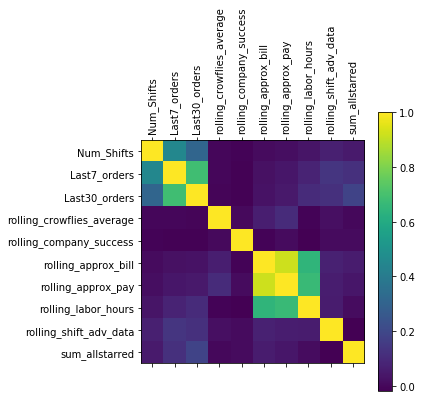

In [128]:
plt.rcParams["figure.figsize"] = [5,5]

cor = training_data[predictor_cols_1].corr(method = 'pearson', min_periods = 1)
x = cor.columns
plt.figure(figsize = (20,20))
plt.matshow(cor)
plt.xticks(range(len(x)), x, rotation='vertical')
plt.yticks(range(len(x)), x)
plt.colorbar()
plt.show()

In [129]:
last_date

Timestamp('2018-03-09 00:00:00')

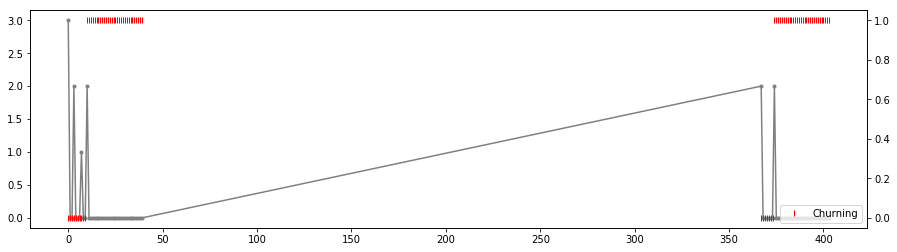

In [130]:
plot_company_1 = pre_holdout_companies[75]
selected_company_data = work_with.loc[plot_company_1]
plt.figure(figsize=[15,4])
plt.plot(pre_holdout_data.loc[plot_company_1].index, selected_company_data.Num_Shifts.iloc[:len(pre_holdout_data.loc[plot_company_1])], marker='.', color='grey')
ax = plt.twinx()
pre_holdout_data.loc[plot_company_1, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red', ax=ax)


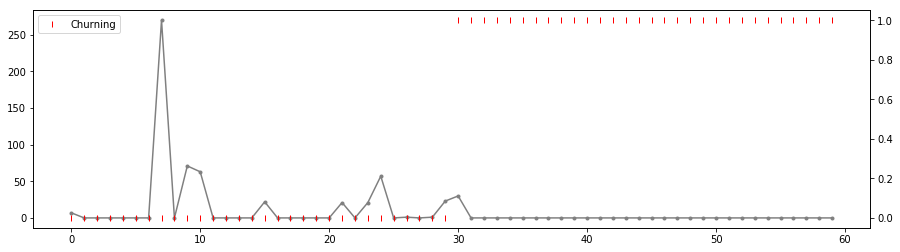

In [227]:
plot_company_1 = pre_holdout_companies[3]
selected_company_data = work_with.loc[plot_company_1]
plt.figure(figsize=[15,4])
plt.plot(pre_holdout_data.loc[plot_company_1].index, selected_company_data.Num_Shifts.iloc[:len(pre_holdout_data.loc[plot_company_1])], marker='.', color='grey')
ax = plt.twinx()
pre_holdout_data.loc[plot_company_1, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red', ax=ax)


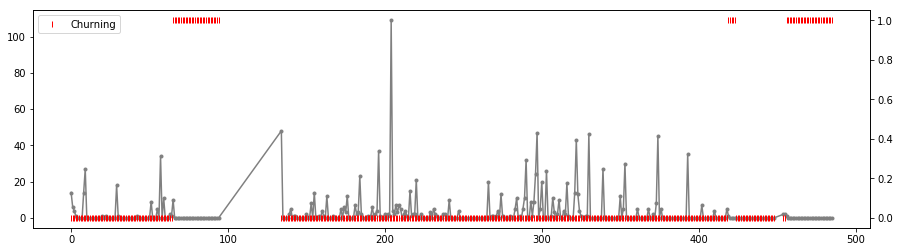

In [228]:
plot_company_1 = pre_holdout_companies[41]
selected_company_data = work_with.loc[plot_company_1]
plt.figure(figsize=[15,4])
plt.plot(pre_holdout_data.loc[plot_company_1].index, selected_company_data.Num_Shifts.iloc[:len(pre_holdout_data.loc[plot_company_1])], marker='.', color='grey')
ax = plt.twinx()
pre_holdout_data.loc[plot_company_1, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red', ax=ax)


In [131]:
from sklearn.metrics import precision_recall_fscore_support
def fit_and_predict(predictor_cols, target_col, model_type='lr', fillna=0):
    if model_type == 'lr':
        model = LogisticRegression()
    elif model_type == 'tree':
        model = DecisionTreeClassifier()
    elif model_type == 'nb':
        model = GaussianNB()
    elif model_type == 'gb':
        model = GradientBoostingClassifier()
    elif model_type == 'extratree':
        model= ExtraTreesClassifier()
    
    model.fit(training_data[predictor_cols].fillna(fillna), training_data[target_col].fillna(fillna))
    pre_holdout_data_dependent_pred = model.predict(pre_holdout_data[predictor_cols].fillna(fillna))    
    pre_holdout_data_dependent_pred_proba = model.predict_proba(pre_holdout_data[predictor_cols].fillna(fillna))
    cm = confusion_matrix(pre_holdout_data[target_col].fillna(fillna), pre_holdout_data_dependent_pred)
    print(cm)
    print(classification_report(pre_holdout_data[target_col].fillna(fillna), pre_holdout_data_dependent_pred))
    print( precision_recall_fscore_support(pre_holdout_data[target_col].fillna(fillna), pre_holdout_data_dependent_pred, beta=0.5))
    sns.jointplot(pre_holdout_data_dependent_pred_proba[:,1], pre_holdout_data[target_col].fillna(fillna).astype(float).values[:,0], kind='reg', x_bins=100)
    return model, pre_holdout_data_dependent_pred_proba, pre_holdout_data_dependent_pred

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier

/Users/laavanyaganesh/repo/client_churn/venv/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[46193   269]
 [16927   401]]
             precision    recall  f1-score   support

      False       0.73      0.99      0.84     46462
       True       0.60      0.02      0.04     17328

avg / total       0.70      0.73      0.63     63790

(array([0.73182826, 0.59850746]), array([0.99421032, 0.02314174]), array([0.77260806, 0.10020992]), array([46462, 17328]))


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False), array([[0.91773525, 0.08226475],
        [0.91773525, 0.08226475],
        [0.96036005, 0.03963995],
        ...,
        [0.54420793, 0.45579207],
        [0.54420793, 0.45579207],
        [0.54420793, 0.45579207]]), array([False, False, False, ..., False, False, False]))

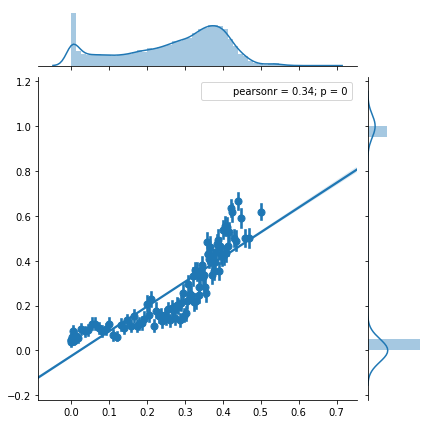

In [133]:
fit_and_predict(predictor_cols_1, target_cols, 'lr')

[[10733 35729]
 [ 1475 15853]]
             precision    recall  f1-score   support

      False       0.88      0.23      0.37     46462
       True       0.31      0.91      0.46     17328

avg / total       0.72      0.42      0.39     63790

(array([0.87917759, 0.30733589]), array([0.23100598, 0.91487765]), array([0.56315193, 0.35440587]), array([46462, 17328]))


(GaussianNB(priors=None), array([[0.82856888, 0.17143112],
        [0.82856888, 0.17143112],
        [0.96658231, 0.03341769],
        ...,
        [0.00711525, 0.99288475],
        [0.00711525, 0.99288475],
        [0.00711525, 0.99288475]]), array([False, False, False, ...,  True,  True,  True]))

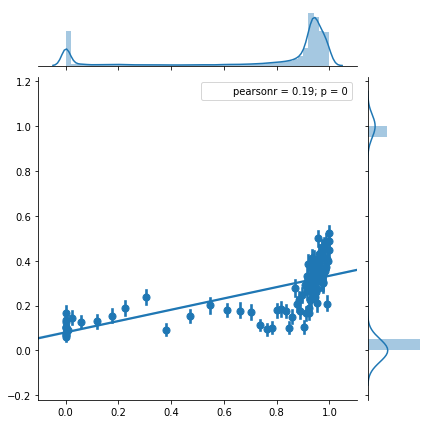

In [134]:
fit_and_predict(predictor_cols_1, target_cols, 'nb')

[[38511  7951]
 [11232  6096]]
             precision    recall  f1-score   support

      False       0.77      0.83      0.80     46462
       True       0.43      0.35      0.39     17328

avg / total       0.68      0.70      0.69     63790

(array([0.77419938, 0.43397167]), array([0.82887091, 0.35180055]), array([0.784549  , 0.41460362]), array([46462, 17328]))


(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'), array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]), array([False, False, False, ...,  True,  True,  True]))

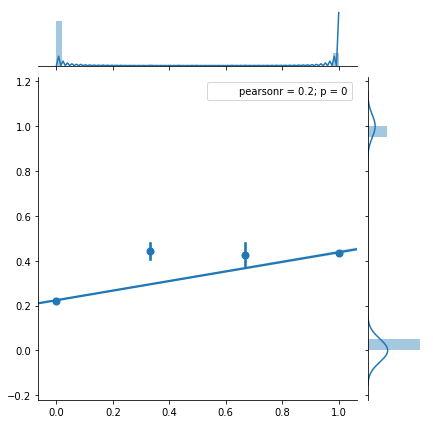

In [135]:
fit_and_predict(predictor_cols_1, target_cols, 'tree')

/Users/laavanyaganesh/repo/client_churn/venv/lib/python2.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[44441  2021]
 [13924  3404]]
             precision    recall  f1-score   support

      False       0.76      0.96      0.85     46462
       True       0.63      0.20      0.30     17328

avg / total       0.73      0.75      0.70     63790

(array([0.76143237, 0.62746544]), array([0.95650209, 0.19644506]), array([0.79381042, 0.43609716]), array([46462, 17328]))


(ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 array([[1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        ...,
        [0.4, 0.6],
        [0.4, 0.6],
        [0.4, 0.6]]),
 array([False, False, False, ...,  True,  True,  True]))

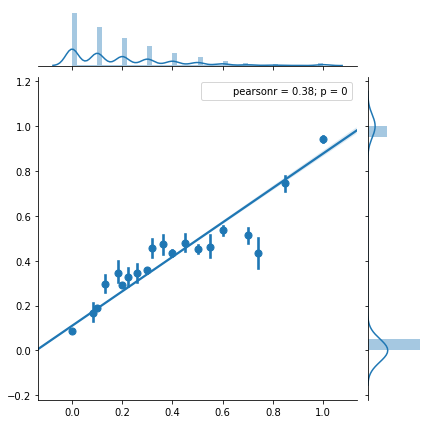

In [136]:
fit_and_predict(predictor_cols_1, target_cols, 'extratree')

[[41059  5403]
 [10626  6702]]
             precision    recall  f1-score   support

      False       0.79      0.88      0.84     46462
       True       0.55      0.39      0.46     17328

avg / total       0.73      0.75      0.73     63790

(array([0.79440844, 0.55365551]), array([0.88371142, 0.38677285]), array([0.81079533, 0.5096733 ]), array([46462, 17328]))


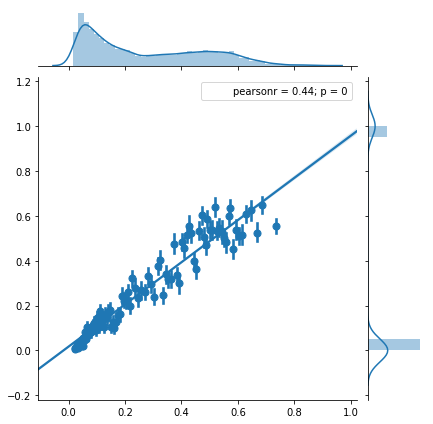

In [137]:
gb, proba, pred = fit_and_predict(predictor_cols_1, target_cols, 'gb')

In [138]:
from sklearn.metrics import mutual_info_score

In [139]:
score = mutual_info_score(pre_holdout_data['Churning'],pred)

In [140]:
score

0.04279896654878379

In [141]:
p_true = pre_holdout_data['Churning'].mean()

In [142]:
p_false = 1-p_true

In [143]:
from scipy.stats import entropy
ent = entropy([p_true,p_false])

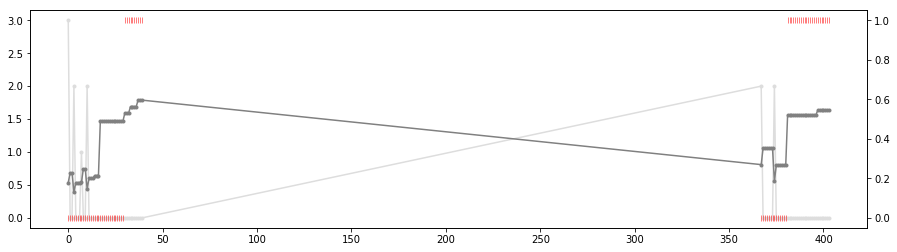

In [144]:
plot_company_1 = pre_holdout_companies[75]
selected_company_data = work_with.loc[plot_company_1]
plt.figure(figsize=[15,4])
plt.plot(pre_holdout_data.loc[plot_company_1].index, selected_company_data.Num_Shifts.iloc[:len(pre_holdout_data.loc[plot_company_1])], marker='.', color='#DDDDDD')
ax = plt.twinx()
# pre_holdout_data.loc[plot_company, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red', ax=ax)
# pd.Series(pre_holdout_data_dependent_proba, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
# pd.Series(pre_holdout_data_dependent_pred, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
plt.plot(pre_holdout_data.loc[plot_company_1].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company_1,1], marker='.', color='grey', )
plt.plot(pre_holdout_data.loc[plot_company_1].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company_1,1]>0.5, linestyle='',marker='|', alpha=0.5, color='red')


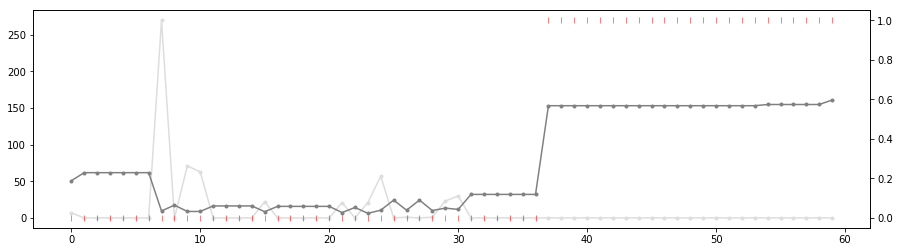

In [225]:
plot_company_1 = pre_holdout_companies[3]
selected_company_data = work_with.loc[plot_company_1]
plt.figure(figsize=[15,4])
plt.plot(pre_holdout_data.loc[plot_company_1].index, selected_company_data.Num_Shifts.iloc[:len(pre_holdout_data.loc[plot_company_1])], marker='.', color='#DDDDDD')
ax = plt.twinx()
# pre_holdout_data.loc[plot_company, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red', ax=ax)
# pd.Series(pre_holdout_data_dependent_proba, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
# pd.Series(pre_holdout_data_dependent_pred, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
plt.plot(pre_holdout_data.loc[plot_company_1].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company_1,1], marker='.', color='grey', )
plt.plot(pre_holdout_data.loc[plot_company_1].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company_1,1]>0.5, linestyle='',marker='|', alpha=0.5, color='red')


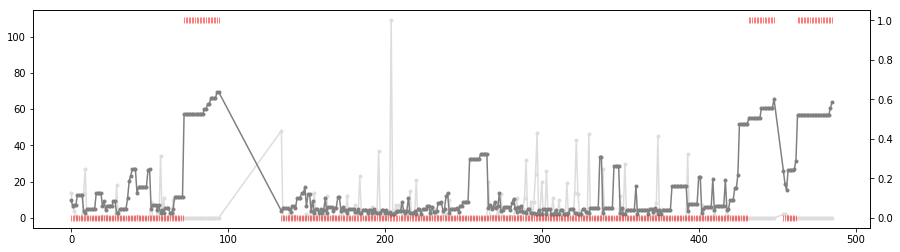

In [226]:
plot_company_1 = pre_holdout_companies[41]
selected_company_data = work_with.loc[plot_company_1]
plt.figure(figsize=[15,4])
plt.plot(pre_holdout_data.loc[plot_company_1].index, selected_company_data.Num_Shifts.iloc[:len(pre_holdout_data.loc[plot_company_1])], marker='.', color='#DDDDDD')
ax = plt.twinx()
# pre_holdout_data.loc[plot_company, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red', ax=ax)
# pd.Series(pre_holdout_data_dependent_proba, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
# pd.Series(pre_holdout_data_dependent_pred, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
plt.plot(pre_holdout_data.loc[plot_company_1].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company_1,1], marker='.', color='grey', )
plt.plot(pre_holdout_data.loc[plot_company_1].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company_1,1]>0.5, linestyle='',marker='|', alpha=0.5, color='red')


In [145]:
ent

0.5848845118762966

In [146]:
uncertainity_explained = score/ent

In [147]:
uncertainity_explained

0.07317507247966892

In [148]:
prob_train = gb.predict_proba(training_data[predictor_cols_1].fillna(0))

In [149]:
prob_test = gb.predict_proba(test_data[predictor_cols_1].fillna(0))

([<matplotlib.axis.YTick at 0x186e2d610>,
 <a list of 5 Text yticklabel objects>)

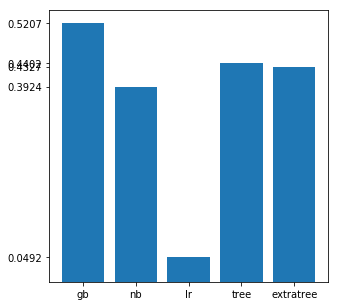

In [150]:
f05 = [0.52069674, 0.39241838, 0.04921609, 0.4402268, 0.43267131]
models = ['gb','nb','lr','tree','extratree']


import numpy as np                                                               
import matplotlib.pyplot as plt

top=[('gb',0.52069674),('nb',0.39241838),('lr',0.04921609), ('tree',0.4402268),('extratree',0.43267131)]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 


plt.bar(xs, ys, align='center')

plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)


/Users/laavanyaganesh/repo/client_churn/venv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


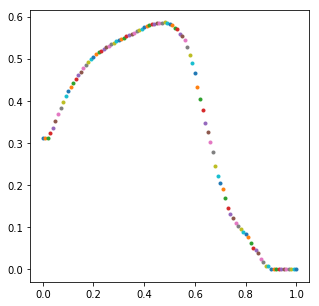

In [151]:
for i in np.arange(0,1.01,0.01):
    a = (precision_recall_fscore_support(training_data[target_cols].fillna(0), prob_train[:,1]>=i, beta=0.5))
    plt.plot(i,a[2][1],marker='.')

In [190]:
# 1976 is an example of a seasonal company

1976

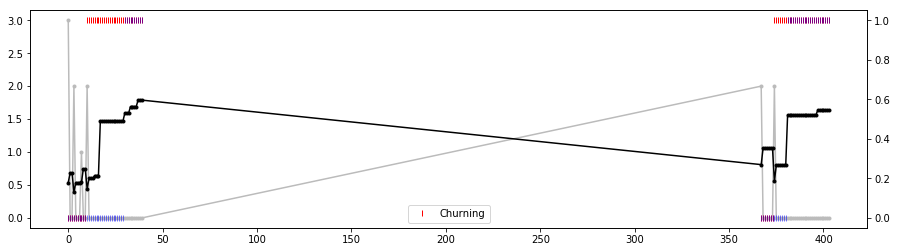

In [200]:
plot_company = pre_holdout_companies[75]
selected_company_data = work_with.loc[plot_company]
plt.plot(pre_holdout_data.loc[plot_company].index, selected_company_data.Num_Shifts.iloc[:len(pre_holdout_data.loc[plot_company])], marker='.', color='#BBBBBB')
ax = plt.twinx()
pre_holdout_data.loc[plot_company, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red', ax=ax)
plt.plot(pre_holdout_data.loc[plot_company].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company,1], marker='.', color='black')
plt.plot(pre_holdout_data.loc[plot_company].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company,1]>0.5, linestyle='',marker='|', alpha=0.5, color='blue')
# pd.Series(pre_holdout_data_dependent_proba, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
# pd.Series(pre_holdout_data_dependent_pred, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')

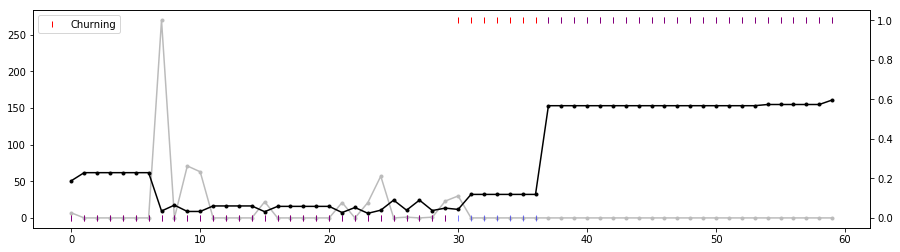

In [201]:
plot_company = pre_holdout_companies[3]
selected_company_data = work_with.loc[plot_company]
plt.plot(pre_holdout_data.loc[plot_company].index, selected_company_data.Num_Shifts.iloc[:len(pre_holdout_data.loc[plot_company])], marker='.', color='#BBBBBB')
ax = plt.twinx()
pre_holdout_data.loc[plot_company, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red', ax=ax)
plt.plot(pre_holdout_data.loc[plot_company].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company,1], marker='.', color='black')
plt.plot(pre_holdout_data.loc[plot_company].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company,1]>0.5, linestyle='',marker='|', alpha=0.5, color='blue')
# pd.Series(pre_holdout_data_dependent_proba, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
# pd.Series(pre_holdout_data_dependent_pred, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')

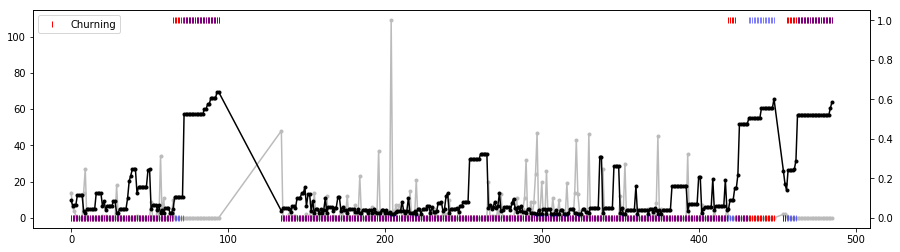

In [224]:
plot_company = pre_holdout_companies[41]
selected_company_data = work_with.loc[plot_company]
plt.plot(pre_holdout_data.loc[plot_company].index, selected_company_data.Num_Shifts.iloc[:len(pre_holdout_data.loc[plot_company])], marker='.', color='#BBBBBB')
ax = plt.twinx()
pre_holdout_data.loc[plot_company, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red', ax=ax)
plt.plot(pre_holdout_data.loc[plot_company].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company,1], marker='.', color='black')
plt.plot(pre_holdout_data.loc[plot_company].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company,1]>0.5, linestyle='',marker='|', alpha=0.5, color='blue')
# pd.Series(pre_holdout_data_dependent_proba, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
# pd.Series(pre_holdout_data_dependent_pred, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')

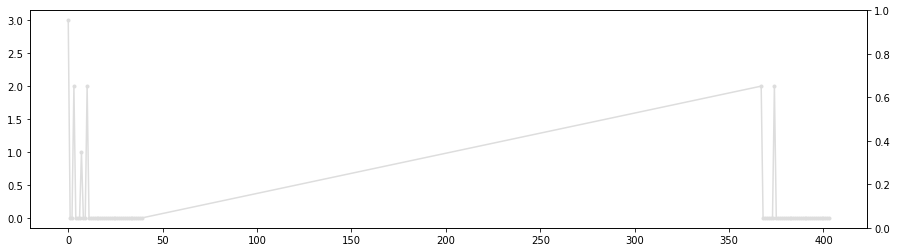

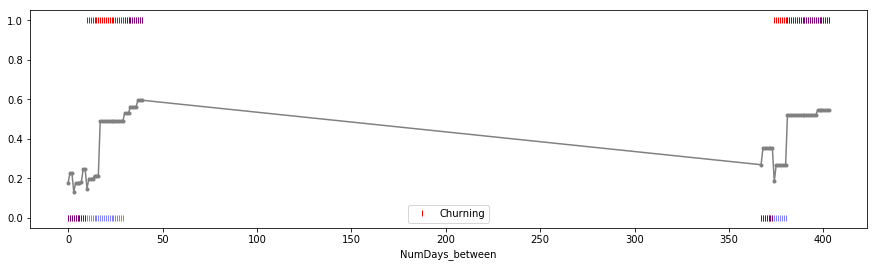

In [153]:
plot_company_1 = pre_holdout_companies[75]
selected_company_data = work_with.loc[plot_company_1]
plt.figure(figsize=[15,4])
plt.plot(pre_holdout_data.loc[plot_company_1].index, selected_company_data.Num_Shifts.iloc[:len(pre_holdout_data.loc[plot_company_1])], marker='.', color='#DDDDDD')
ax = plt.twinx()
# pre_holdout_data.loc[plot_company, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red', ax=ax)
# pd.Series(pre_holdout_data_dependent_proba, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
# pd.Series(pre_holdout_data_dependent_pred, index = pre_holdout_data_dependent.index).loc[plot_company].astype(float).plot(linestyle='',marker='.')
pre_holdout_data.loc[plot_company, target_cols].astype(float).plot(marker='|', linestyle='', figsize=[15,4],color='red')
plt.plot(pre_holdout_data.loc[plot_company].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company,1], marker='.', color='grey')
plt.plot(pre_holdout_data.loc[plot_company].index, proba[pre_holdout_data.index.get_level_values(0)==plot_company,1]>0.5, linestyle='',marker='|', alpha=0.5, color='blue')


(0.0, 1.0)

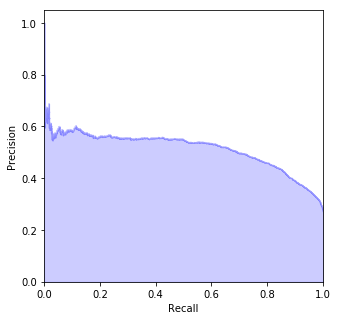

In [154]:
import sklearn

precision, recall, _  = sklearn.metrics.precision_recall_curve(pre_holdout_data[target_cols],proba[:,1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

                           correlation  feature_imp
Num_Shifts                   -0.073923     0.029613
sum_allstarred               -0.059719     0.045539
rolling_approx_pay           -0.007502     0.070983
rolling_approx_bill          -0.007483     0.092294
rolling_company_success      -0.025132     0.102341
rolling_labor_hours          -0.062588     0.111232
Last30_orders                -0.164861     0.113194
rolling_crowflies_average     0.015089     0.134788
rolling_shift_adv_data       -0.083336     0.144163
Last7_orders                 -0.150209     0.155854


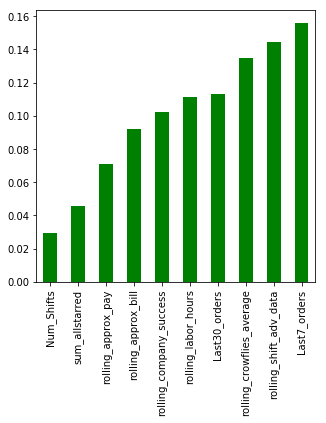

In [155]:
df = pd.DataFrame({'feature_imp': gb.feature_importances_,
              'correlation': training_data[predictor_cols_1 + target_cols].corr().Churning[predictor_cols_1]},
             index=predictor_cols_1).sort_values('feature_imp')

print(df)

df['feature_imp'].plot(kind='bar', color='g')

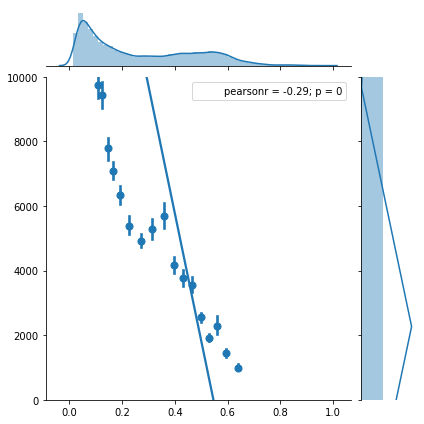

In [156]:
sns.jointplot(
    prob_train[:,1], 
    training_data[['Future30_profit']].fillna(0).astype(float).values[:,0], 
    kind='reg', 
    x_bins=25
    ,
    ylim=[0,10000]
)

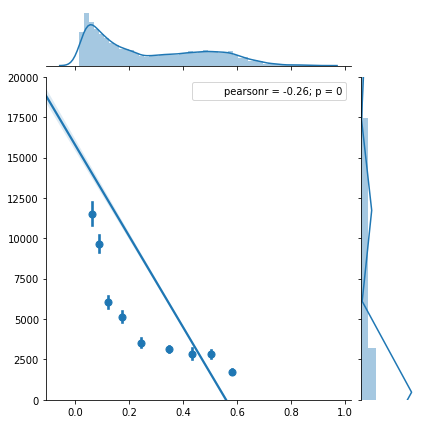

In [157]:
sns.jointplot(
    proba[:,1], 
    pre_holdout_data[['Future30_profit']].astype(float).values[:,0], 
    kind='reg', 
    x_bins=10
    ,
    ylim=[0,20000]
)

In [158]:
pre_holdout_data.Future30_profit.min()

-82167.53124999999

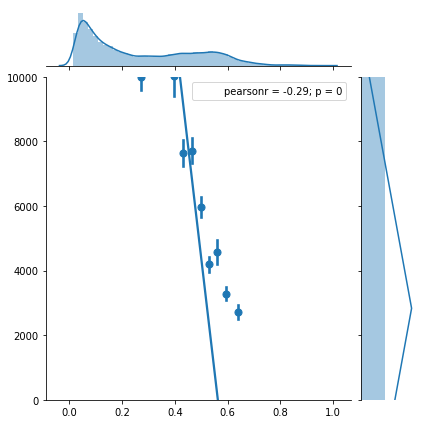

In [159]:
sns.jointplot(
    prob_train[:,1], 
    training_data[['Future60_profit']].fillna(0).astype(float).values[:,0], 
    kind='reg', 
    x_bins=25
    ,
    ylim=[0,10000]
)

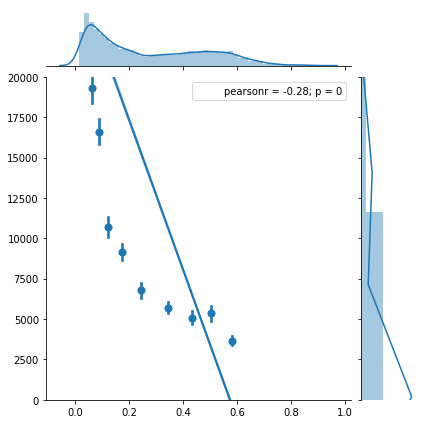

In [160]:
sns.jointplot(
    proba[:,1], 
    pre_holdout_data[['Future60_profit']].astype(float).values[:,0], 
    kind='reg', 
    x_bins=10
    ,
    ylim=[0,20000]
)

In [161]:
pre_holdout_data.Future60_profit.min()

-128023.30208333333

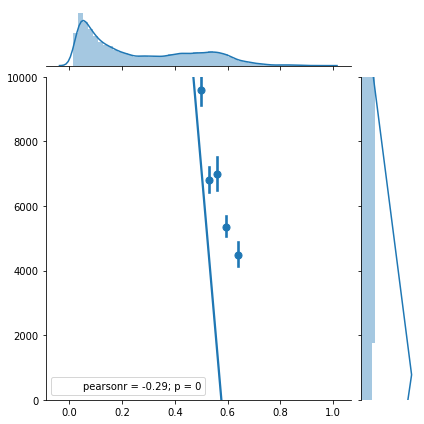

In [162]:
sns.jointplot(
    prob_train[:,1], 
    training_data[['Future90_profit']].fillna(0).astype(float).values[:,0], 
    kind='reg', 
    x_bins=25
    ,
    ylim=[0,10000]
)

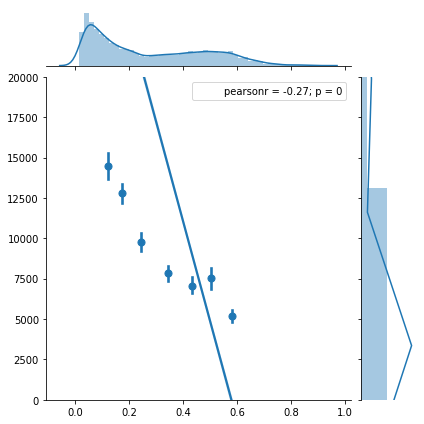

In [163]:
sns.jointplot(
    proba[:,1], 
    pre_holdout_data[['Future90_profit']].astype(float).values[:,0], 
    kind='reg', 
    x_bins=10
    ,
    ylim=[0,20000]
)

In [164]:
pre_holdout_data.Future90_profit.min()

-132308.92708333334

In [165]:
# sns.jointplot(
#     proba[:,1], 
#     pre_holdout_data[['sum_profit']].astype(float).values[:,0], 
#     kind='reg', 
#     x_bins=10
#     ,
#     ylim=[0,10000]
# )

In [166]:
(pd.cut(prob_train[:,1], np.arange(-0.1,1.01,0.1))).shape

(336881,)

In [167]:
pre_holdout_data.groupby([target_cols[0], pd.cut(proba[:,1], np.arange(-0.1,1.01,0.1))]).size()

Churning            
False     (0.0, 0.1]    18084
          (0.1, 0.2]    10387
          (0.2, 0.3]     4629
          (0.3, 0.4]     4112
          (0.4, 0.5]     3847
          (0.5, 0.6]     3427
          (0.6, 0.7]     1532
          (0.7, 0.8]      338
          (0.8, 0.9]      106
True      (0.0, 0.1]     1094
          (0.1, 0.2]     1862
          (0.2, 0.3]     1693
          (0.3, 0.4]     2164
          (0.4, 0.5]     3813
          (0.5, 0.6]     4044
          (0.6, 0.7]     2079
          (0.7, 0.8]      403
          (0.8, 0.9]      176
dtype: int64

In [168]:
pre_holdout_data.groupby([target_cols[0], pd.cut(proba[:,1], np.arange(-0.1,1.01,0.1))]).Future30_profit.mean()

Churning            
False     (0.0, 0.1]    1.985981e+04
          (0.1, 0.2]    6.893867e+03
          (0.2, 0.3]    5.193893e+03
          (0.3, 0.4]    4.603571e+03
          (0.4, 0.5]    6.114234e+03
          (0.5, 0.6]    4.279247e+03
          (0.6, 0.7]    4.058297e+03
          (0.7, 0.8]    5.076885e+03
          (0.8, 0.9]    7.702297e+03
True      (0.0, 0.1]    2.352358e-12
          (0.1, 0.2]   -1.004681e-13
          (0.2, 0.3]    1.108581e-12
          (0.3, 0.4]    1.400403e-12
          (0.4, 0.5]    4.661882e-13
          (0.5, 0.6]   -5.244136e-13
          (0.6, 0.7]    1.230357e-12
          (0.7, 0.8]    9.952359e-13
          (0.8, 0.9]    0.000000e+00
Name: Future30_profit, dtype: float64

In [169]:
pre_holdout_data.groupby([target_cols[0], pd.cut(proba[:,1], np.arange(-0.1,1.01,0.1))]).Future60_profit.mean()

Churning            
False     (0.0, 0.1]    33105.561498
          (0.1, 0.2]    11894.993370
          (0.2, 0.3]     8897.143588
          (0.3, 0.4]     7864.869430
          (0.4, 0.5]    10436.019495
          (0.5, 0.6]     6957.126007
          (0.6, 0.7]     7324.110218
          (0.7, 0.8]     9655.022942
          (0.8, 0.9]    10956.019171
True      (0.0, 0.1]     2762.073555
          (0.1, 0.2]     2343.447263
          (0.2, 0.3]     2165.492223
          (0.3, 0.4]      573.981237
          (0.4, 0.5]      999.686653
          (0.5, 0.6]      877.842543
          (0.6, 0.7]     1437.133541
          (0.7, 0.8]     1357.982014
          (0.8, 0.9]        0.000000
Name: Future60_profit, dtype: float64

In [170]:
pre_holdout_data.groupby([target_cols[0], pd.cut(proba[:,1], np.arange(-0.1,1.01,0.1))]).Future90_profit.mean()

Churning            
False     (0.0, 0.1]    44155.548498
          (0.1, 0.2]    16025.415118
          (0.2, 0.3]    12138.572505
          (0.3, 0.4]    10462.018328
          (0.4, 0.5]    13832.075540
          (0.5, 0.6]     9007.812043
          (0.6, 0.7]    10117.508908
          (0.7, 0.8]    12248.408454
          (0.8, 0.9]    12221.365002
True      (0.0, 0.1]     6170.954930
          (0.1, 0.2]     4753.744328
          (0.2, 0.3]     4285.607627
          (0.3, 0.4]     1292.854945
          (0.4, 0.5]     2186.941376
          (0.5, 0.6]     1785.732331
          (0.6, 0.7]     2526.676306
          (0.7, 0.8]     3053.851644
          (0.8, 0.9]        0.000000
Name: Future90_profit, dtype: float64

In [171]:
pre_holdout_data.groupby([target_cols[0], pd.cut(proba[:,1], np.arange(-0.1,1.01,0.1))]).Future30_orders.mean()

Churning            
False     (0.0, 0.1]    74.501382
          (0.1, 0.2]    27.772023
          (0.2, 0.3]    19.530568
          (0.3, 0.4]    19.448687
          (0.4, 0.5]    25.227190
          (0.5, 0.6]    16.021593
          (0.6, 0.7]    13.999347
          (0.7, 0.8]    17.461538
          (0.8, 0.9]    34.320755
True      (0.0, 0.1]     0.000000
          (0.1, 0.2]     0.000000
          (0.2, 0.3]     0.000000
          (0.3, 0.4]     0.000000
          (0.4, 0.5]     0.000000
          (0.5, 0.6]     0.000000
          (0.6, 0.7]     0.000000
          (0.7, 0.8]     0.000000
          (0.8, 0.9]     0.000000
Name: Future30_orders, dtype: float64

[Text(0,0,u'0.0'),
 Text(0,0,u'0.1'),
 Text(0,0,u'0.2'),
 Text(0,0,u'0.3'),
 Text(0,0,u'0.4'),
 Text(0,0,u'0.5'),
 Text(0,0,u'0.6'),
 Text(0,0,u'0.7'),
 Text(0,0,u'0.8'),
 Text(0,0,u'0.9'),
 Text(0,0,u'1.0')]

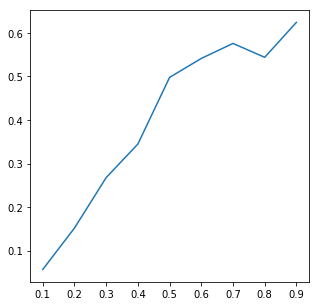

In [172]:
a = pre_holdout_data.groupby(pd.cut(proba[:,1], np.arange(-0.1,1.01,0.1))).Churning.mean()
ax = a.plot()
ax.set_xticklabels([x.right for x in a.index])

[Text(0,0,u'0.0'),
 Text(0,0,u'0.1'),
 Text(0,0,u'0.2'),
 Text(0,0,u'0.3'),
 Text(0,0,u'0.4'),
 Text(0,0,u'0.5'),
 Text(0,0,u'0.6'),
 Text(0,0,u'0.7'),
 Text(0,0,u'0.8'),
 Text(0,0,u'0.9'),
 Text(0,0,u'1.0')]

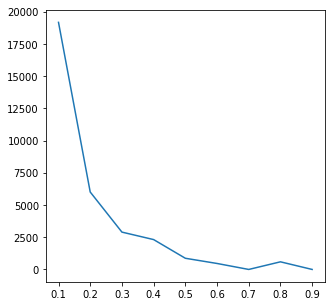

In [173]:
a = pre_holdout_data.groupby(pd.cut(proba[:,1], np.arange(-0.1,1.01,0.1))).Future90_profit.median()
ax = a.plot()
ax.set_xticklabels([x.right for x in a.index])

In [174]:
pre_holdout_data.Past30_profit.mean()

10984.911590716805

In [175]:
m = pre_holdout_data.groupby([target_cols[0], pd.cut(proba[:,1], np.arange(-0.1,1.01,0.1))]).Past60_profit.mean()

In [176]:
m

Churning            
False     (0.0, 0.1]    21440.052162
          (0.1, 0.2]     7184.706447
          (0.2, 0.3]     5600.590156
          (0.3, 0.4]     6743.580527
          (0.4, 0.5]     5001.753520
          (0.5, 0.6]     3784.581732
          (0.6, 0.7]     3058.208444
          (0.7, 0.8]      512.611008
          (0.8, 0.9]     7818.192665
True      (0.0, 0.1]    17932.159620
          (0.1, 0.2]     7427.359916
          (0.2, 0.3]    13744.647857
          (0.3, 0.4]    11328.581113
          (0.4, 0.5]    10168.242651
          (0.5, 0.6]     6411.337942
          (0.6, 0.7]     5849.265959
          (0.7, 0.8]     1422.825082
          (0.8, 0.9]        0.000000
Name: Past60_profit, dtype: float64

In [177]:
b = pre_holdout_data.groupby([target_cols[0], pd.cut(proba[:,1], np.arange(-0.1,1.01,0.1))]).Future90_profit.median()

In [178]:
k = pre_holdout_data.groupby([target_cols[0], pd.cut(proba[:,1], np.arange(-0.1,1.01,0.1))]).Future30_profit.median()

[Text(0,0,u'0.1'),
 Text(0,0,u'0.2'),
 Text(0,0,u'0.3'),
 Text(0,0,u'0.4'),
 Text(0,0,u'0.5'),
 Text(0,0,u'0.6'),
 Text(0,0,u'0.7'),
 Text(0,0,u'0.8'),
 Text(0,0,u'0.9')]

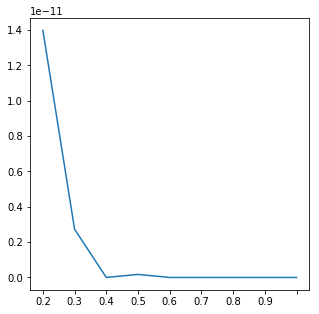

In [179]:
ax = b.loc[True].plot()
ax.set_xticklabels([x.right for x in b.loc[True].index])

[Text(0,0,u'0.1'),
 Text(0,0,u'0.2'),
 Text(0,0,u'0.3'),
 Text(0,0,u'0.4'),
 Text(0,0,u'0.5'),
 Text(0,0,u'0.6'),
 Text(0,0,u'0.7'),
 Text(0,0,u'0.8'),
 Text(0,0,u'0.9')]

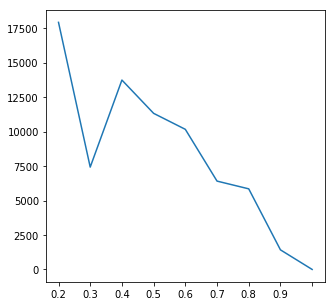

In [180]:
ax = m.loc[True].plot()
ax.set_xticklabels([x.right for x in m.loc[True].index])

In [181]:
k.dropna().diff().iloc[2:].mean()

-188.23898437499935

In [182]:
a = k[True].index.values
b = [0,2,3,4,5,6,7,8,9]
ind = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

In [183]:
diff = list()
for i in b:
    diff.append(k[False][i]-k[True][i])

In [184]:
diff

[8662.312499999993,
 3011.8237499999896,
 1729.2426805555651,
 1834.2546333333485,
 1874.75,
 1335.7437499999999,
 789.7500000000002,
 1220.0390624999714,
 1150.754777777779]

In [185]:
np.array(diff[1:]).mean()

1618.2948317708317

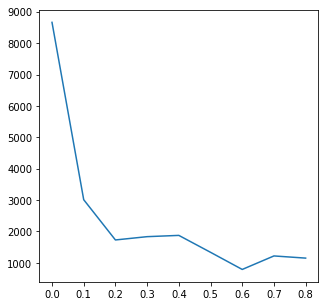

In [186]:
import matplotlib.pyplot as plt
#a = list(a[:-1])
plt.plot(ind, diff)

In [187]:
pre_holdout_data['Churning'].mean()

0.27164132309139366

In [188]:
(pre_holdout_data['Churning']== pred).mean()

0.7487223702774729

In [ ]:
# merged = company_markets.merge(training_data.reset_index(), on='company_id', how='right')

In [ ]:
# sns.jointplot(
#     x=merged['rolling_shift_adv_data'].values, 
#     y=merged['Churning'].astype(float).values,
#     kind='reg',  
#     x_bins=25,
#     xlim=[0,25],
#     ylim=[0,0.5],
    
# ).set_axis_labels("Churning", "Rolling_shift_adv_data")

In [ ]:
# sns.jointplot(
#     x=merged[merged.company_market_id==1]['rolling_shift_adv_data'].values, 
#     y=merged[merged.company_market_id==1]['Churning'].astype(float).values,
#     kind='reg',  
#     x_bins=25,
#     xlim=[0,25],
#     ylim=[0,0.5]
# ).set_axis_labels("Churning", "Rolling_shift_adv_data: market_id=1")

In [ ]:
# import numpy as np                                                               
# import matplotlib.pyplot as plt

# top_1=[('overall',0.07),('2',0.018),('1',0.036), ('3',0.044),('13',0.059), ('12',0.062),('5',0.082),('4',0.1),('8',0.1),('10',0.11),('11',0.12),('9',0.16),('7',0.17),('6',0.19)]

# labels, ys = zip(*top_1)
# xs = np.arange(len(labels)) 


# plt.bar(xs, ys, align='center')

# plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
# plt.yticks(ys)